In [1]:
from Dataset import SpotifyDataset
from LRGeomCG import LRGeomCG

In [2]:
ds = SpotifyDataset(src_path = '../data', min_playlist_len = 3000, min_num_tracks = 100)
data = ds.get_data()

100%|████████████████████████████████| 278000/278000 [00:06<00:00, 43470.32it/s]


In [3]:
optim = LRGeomCG ("""{
            "num_iters": 1000, 
            "tol": 1e-7}""")

In [68]:
import numpy as np
m , n = data.shape
omega = np.random.choice(m*n, 50000, replace=False)
omega_mask = np.zeros((m * n,), dtype=bool)
omega_mask[omega] = True
omega_mask = omega_mask.reshape(m, n)

In [69]:
np.linalg.matrix_rank(data)

99

In [70]:
completion = optim.complete_matrix(data, omega_mask, 5)

100%|█████████████████████████████████████████| 300/300 [00:11<00:00, 26.77it/s]


/home/vlad/jptr/Skoltech/NLA/MatrixCompletionAlgorithmsOverview/LRGeom.py:126: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


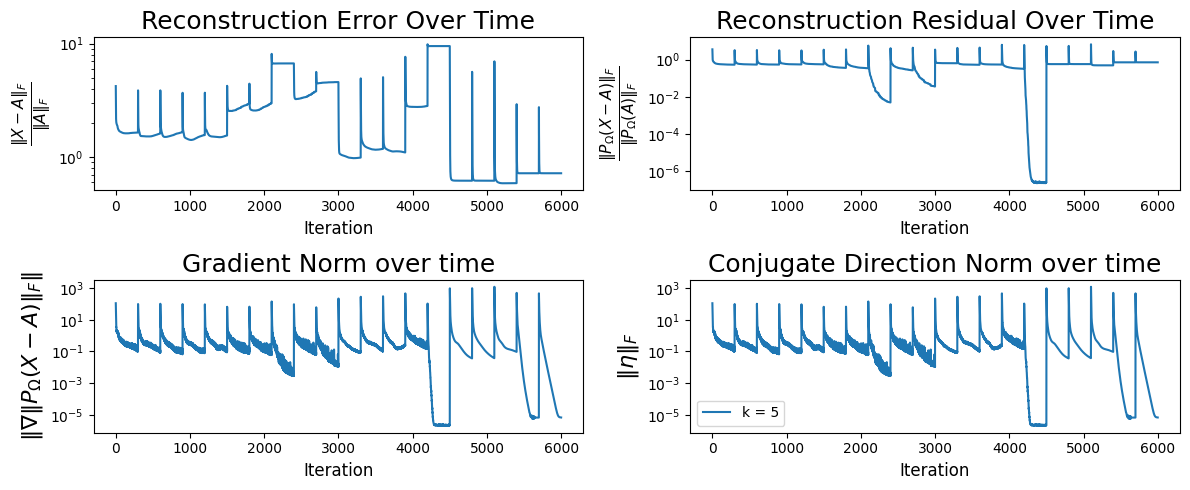

In [71]:
optim.plot_info("SpotifyLRGeomCG.jpg")